# Analysis of water quality grades and score for Bellingen Riverwatch sites in annually and each summer

## Data Description


#### Importing the libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
river_raw = pd.read_excel('bellingen-riverwatch.xlsx',sheet_name='ALL DATA (BY LOCATION) NEW')

In [3]:
river_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   SITE CODE                         990 non-null    object        
 1   Location Name                     990 non-null    object        
 2   Latitude/Northings                985 non-null    float64       
 3   Longitude/Eastings                985 non-null    float64       
 4   EPSG Code                         930 non-null    object        
 5   Survey Date                       990 non-null    datetime64[ns]
 6   Survey Time                       985 non-null    object        
 7   Site observations                 849 non-null    object        
 8   Survey duration (hrs)             596 non-null    object        
 9   Sampler group name *              990 non-null    object        
 10  Number in sampler group           716 non-null    

## Data Dictionary

| Variable Name | Values | Description |
| --- | --- | --- |
|SITE CODE| string: 'B1-'....|Unique site ID|
|Location Name|string: 'Bellinger River-'....|Site name|
|Latitude/Northings|float: -30.00 …|Measurement of distance of north or south of equator|
|Longitude/Eastings|float: - 152.578….|Measurement of distance east or west of prime meridian|
|EPSG Code|string: 'WGS 84'….|Unique code for coordinate system worldwide|
|Survey Date|string:'DD-MM-YY'|Day of conducting survey|
|Survey Time|string:'HH:MM AM/PM'|time of conducting the test|
|Site observations|string:'Low flow -'…|written decription based on oberservation to the site|
|Survey duration (hrs)|float: 0-5|Length of survey |
|Sampler group name *|string: 'Bellinger River'....|Group name|
|Number in sampler group|int: 0 - 30|Number in sampler group|
|No. of volunteers testing|int: 0 - 30|Number of volunteer to do the test|
|Water type|string:'Fresh','Estuarine','Moderate'|Different Types of Water|
|Rainfall in last 7 days|string:'Heavy', 'Moderate','Light','Nil'|Level of rainfall|
|Rainfall (mm) (optional)|float: 0 - 250|measurement of rainfall in millimetre|
|Water level or flow|string:'low', 'medium', 'high', 'Flood',…..|reported water flow and level|
|Rate of Flow (optional)|int: 0 - 5|**PENDING|
|Air Temperature (deg C)|float: 0.0 - 35.0|temperature of air in degrees Celsius (°C)|
|Water Temperature (deg C)|float: 0.0 - 35.0|temperature in water in degrees Celsius (°C)|
|pH (pH units)|float: 0-14|pH value measured in water sample|
|Electrical Conductivity (µS/cm)|float: 0 - 60000|conductivity measured in water sample (only applicable to freshwater ecosystem,exclude estuarine ecosystem)|
|Turbidity (NTUs)|float: 0 - 500|Turbidity measured in water sample|
|Available Phosphate (mg/L)|float: 0 - 1|phosphate measured in water sample|
|Dissolved Oxygen (mg/L)|float: 0 - 12|dissolved oxygen measured in water sample|
|Dissolved Oxygen (% sat)|int: 0 - 150|dissolved oxygen saturation in percentage|
|Faecal Coliforms (CFU/100mL)|int: 0 - 550|Faecal Coliform
bacteria|
|E. coli (CFU/100mL)|||
|Total Phosphate (mg/L)|||
|Nitrates (mg/L as N)|||
|Did you calibrate your EC meter?|string: 'True','Fales','Yes','No'|Whether clean the kit used for measuring Eletrcity conductivity|
|Water Testing Notes/Issues|string|Comment on water testing|
|Photos uploaded|string|url of photo upload|
|Verifyed by Ingrid|string|comment on whether verifiy by organization that representing NSW Waterwatch|
||||
||||

## Data Preparation
### Data cleaning
#### In order to have a more comprehensive picture of the data, I will drop the unnecesary columns and columns with too much missing values (e.g. Faecal Coliforms)
used fillna function in the water parameter columns (contain int or float)

### Data Extraction
- Extracted the desired columns for further cleaning and analysis

In [4]:
river_extracted = river_raw[['SITE CODE','Survey Date','Water type','Rainfall in last 7 days','Air Temperature (deg C)','Water Temperature (deg C)','pH (pH units)','Electrical Conductivity (µS/cm)','Turbidity (NTUs)','Available Phosphate (mg/L)','Dissolved Oxygen (mg/L)','Dissolved Oxygen (% sat)']]

In [5]:
river_extracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   SITE CODE                        990 non-null    object        
 1   Survey Date                      990 non-null    datetime64[ns]
 2   Water type                       692 non-null    object        
 3   Rainfall in last 7 days          867 non-null    object        
 4   Air Temperature (deg C)          935 non-null    float64       
 5   Water Temperature (deg C)        950 non-null    float64       
 6   pH (pH units)                    928 non-null    float64       
 7   Electrical Conductivity (µS/cm)  902 non-null    float64       
 8   Turbidity (NTUs)                 928 non-null    float64       
 9   Available Phosphate (mg/L)       887 non-null    float64       
 10  Dissolved Oxygen (mg/L)          887 non-null    float64      

In [6]:
river_extracted .isnull().sum()

SITE CODE                            0
Survey Date                          0
Water type                         298
Rainfall in last 7 days            123
Air Temperature (deg C)             55
Water Temperature (deg C)           40
pH (pH units)                       62
Electrical Conductivity (µS/cm)     88
Turbidity (NTUs)                    62
Available Phosphate (mg/L)         103
Dissolved Oxygen (mg/L)            103
Dissolved Oxygen (% sat)           107
dtype: int64

Data cleaning: use of fowardfill

In [7]:
river_fill = river_extracted.fillna(method='ffill')

In [8]:
river_fill.shape

(990, 12)

In [9]:
print(river_fill.head(10))

  SITE CODE         Survey Date Water type Rainfall in last 7 days  \
0        B1 2017-10-10 13:20:00      Fresh                Moderate   
1        B1 2017-11-14 14:00:00      Fresh                   Light   
2        B1 2017-12-12 00:00:00      Fresh                Moderate   
3        B1 2018-01-10 11:40:00      Fresh                   Light   
4        B1 2018-02-13 12:45:00      Fresh                     Nil   
5        B1 2018-04-01 12:30:00      Fresh                   Light   
6        B1 2018-10-10 12:00:00      Fresh                   Light   
7        B1 2018-11-14 10:36:00      Fresh                   Light   
8        B1 2018-12-18 10:26:00      Fresh                   Light   
9        B1 2019-02-12 10:23:00      Fresh                   Light   

   Air Temperature (deg C)  Water Temperature (deg C)  pH (pH units)  \
0                     22.0                       20.0            7.0   
1                     24.0                       22.0            7.5   
2            

Making sure there is zero null value in all columns

In [10]:
river_fill.isnull().sum()

SITE CODE                          0
Survey Date                        0
Water type                         0
Rainfall in last 7 days            0
Air Temperature (deg C)            0
Water Temperature (deg C)          0
pH (pH units)                      0
Electrical Conductivity (µS/cm)    0
Turbidity (NTUs)                   0
Available Phosphate (mg/L)         0
Dissolved Oxygen (mg/L)            0
Dissolved Oxygen (% sat)           0
dtype: int64

Compare with table with nan value

In [11]:
river_extracted.describe()

,Air Temperature (deg C),Water Temperature (deg C),pH (pH units),Electrical Conductivity (µS/cm),Turbidity (NTUs),Available Phosphate (mg/L),Dissolved Oxygen (mg/L),Dissolved Oxygen (% sat)
count,935.000000,950.000000,928.000000,902.000000,928.000000,887.000000,887.000000,883.000000
mean,22.336471,18.779368,6.820593,434.398780,10.702047,0.060629,7.452559,79.081540
std,5.394589,4.911246,0.600506,3285.996541,25.293591,0.215433,1.840917,18.021974
min,5.000000,7.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,18.500000,15.000000,6.500000,70.000000,7.000000,0.010000,6.550000,73.000000
50%,22.400000,19.000000,7.000000,80.000000,7.000000,0.030000,7.800000,83.000000
75%,26.000000,22.500000,7.000000,100.000000,10.000000,0.070000,8.800000,90.000000
max,41.500000,32.000000,9.000000,51500.000000,400.000000,6.000000,12.000000,148.000000


In [12]:
river_fill.describe()

,Air Temperature (deg C),Water Temperature (deg C),pH (pH units),Electrical Conductivity (µS/cm),Turbidity (NTUs),Available Phosphate (mg/L),Dissolved Oxygen (mg/L),Dissolved Oxygen (% sat)
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,22.453939,18.854141,6.828869,438.234040,10.591414,0.059604,7.413192,78.765657
std,5.430904,4.928582,0.594307,3223.428304,24.511444,0.204989,1.990233,19.702069
min,5.000000,7.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,18.500000,15.000000,6.500000,70.000000,7.000000,0.010000,6.500000,73.000000
50%,22.500000,19.000000,7.000000,80.000000,7.000000,0.030000,7.800000,83.000000
75%,26.000000,22.500000,7.000000,100.000000,10.000000,0.070000,8.800000,91.000000
max,41.500000,32.000000,9.000000,51500.000000,400.000000,6.000000,12.000000,148.000000


Needed criteria

'Air Temperature (deg C)','Water Temperature (deg C)','pH (pH units)','Electrical Conductivity (µS/cm)','Turbidity (NTUs)','Available Phosphate (mg/L)','Dissolved Oxygen (mg/L)','Dissolved Oxygen (% sat)']]

Define a function called "plot_boxplot"

In [13]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

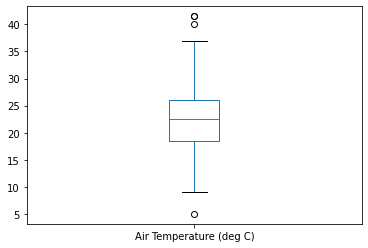

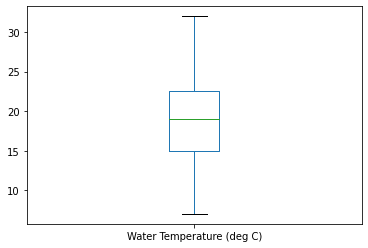

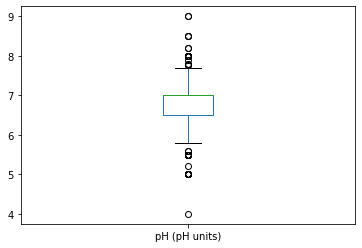

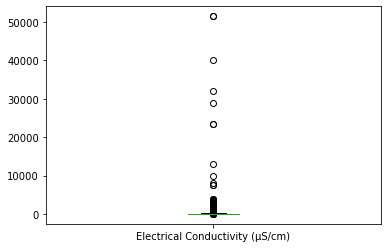

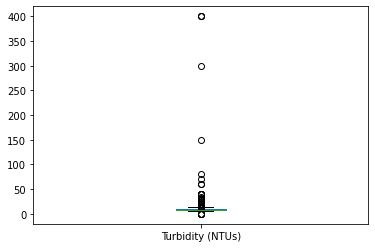

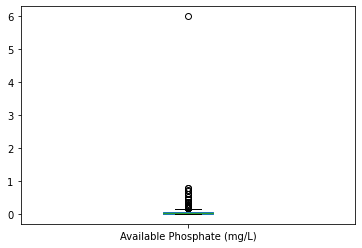

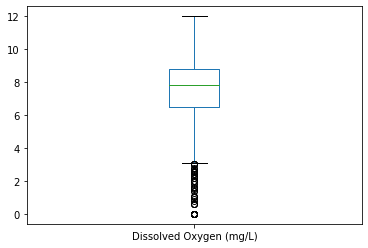

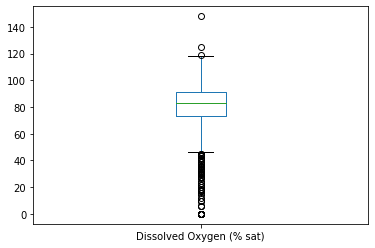

In [14]:
plot_boxplot(river_fill,'Air Temperature (deg C)')
plot_boxplot(river_fill,'Water Temperature (deg C)')
plot_boxplot(river_fill,'pH (pH units)')
plot_boxplot(river_fill,'Electrical Conductivity (µS/cm)')
plot_boxplot(river_fill,'Turbidity (NTUs)')
plot_boxplot(river_fill,'Available Phosphate (mg/L)')
plot_boxplot(river_fill,'Dissolved Oxygen (mg/L)')
plot_boxplot(river_fill,'Dissolved Oxygen (% sat)')

The columns below seem to not contain as many outliers as other columns did.
- Air Temperature (deg C)
- Water Temperature (deg C)
- pH (pH units)

So, decided to remove outliers in columns below:
- Electrical Conductivity (µS/cm)
- Turbidity (NTUs)
- Available Phosphate (mg/L)
- Dissolved Oxygen (mg/L)
- Dissolved Oxygen (% sat)

**Remove outliers**

In [15]:
# define a function called "ouliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5* IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    Is=df.index[(df[ft]< lower_bound)|(df[ft] > upper_bound)]

    return Is

In [16]:
index_list = []

for feature in ['Electrical Conductivity (µS/cm)','Turbidity (NTUs)','Available Phosphate (mg/L)','Dissolved Oxygen (mg/L)','Dissolved Oxygen (% sat)']:
    index_list.extend(outliers(river_fill, feature))

In [17]:
# define a function called 'remove' which return a cleaner dataframe without outliers

def remove(df, Is):
    Is=sorted(set(Is))
    df = df.drop(Is)
    return df

In [18]:
river_cleaned = remove(river_fill,index_list)

In [19]:
river_cleaned.shape

(772, 12)

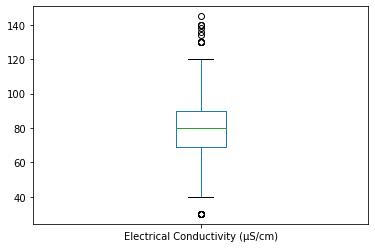

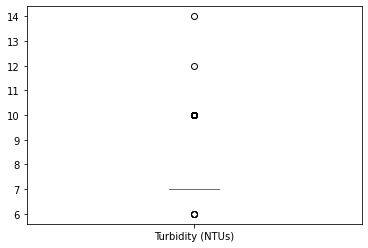

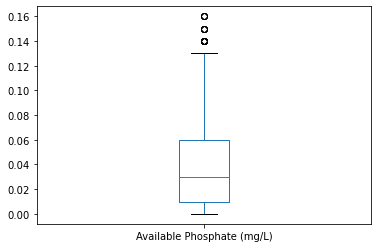

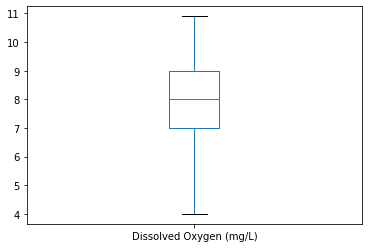

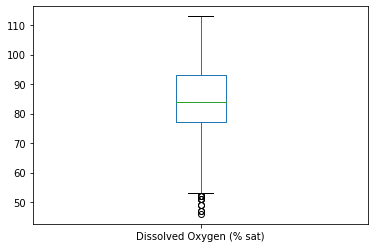

In [20]:
plot_boxplot(river_cleaned,'Electrical Conductivity (µS/cm)')
plot_boxplot(river_cleaned,'Turbidity (NTUs)')
plot_boxplot(river_cleaned,'Available Phosphate (mg/L)')
plot_boxplot(river_cleaned,'Dissolved Oxygen (mg/L)')
plot_boxplot(river_cleaned,'Dissolved Oxygen (% sat)')

Note for myself
- river_raw - look at the data + data dictionary
- river_extracted - extracted the columns I wanted to look at
- river_fill - filled the Nan data with ffill
- river_cleaned - removed the outliers


Identify the year and month of the data 
- annually
- each summer (Dec,Jan,Feb)

Sorted out the year from Survey Date

In [21]:
river_cleaned['year']=river_cleaned['Survey Date'].dt.year

In [22]:
river_cleaned['month']=river_cleaned['Survey Date'].dt.month

In [23]:
river_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 989
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   SITE CODE                        772 non-null    object        
 1   Survey Date                      772 non-null    datetime64[ns]
 2   Water type                       772 non-null    object        
 3   Rainfall in last 7 days          772 non-null    object        
 4   Air Temperature (deg C)          772 non-null    float64       
 5   Water Temperature (deg C)        772 non-null    float64       
 6   pH (pH units)                    772 non-null    float64       
 7   Electrical Conductivity (µS/cm)  772 non-null    float64       
 8   Turbidity (NTUs)                 772 non-null    float64       
 9   Available Phosphate (mg/L)       772 non-null    float64       
 10  Dissolved Oxygen (mg/L)          772 non-null    float64      

'Air Temperature (deg C)','Water Temperature (deg C)','pH (pH units)','Electrical Conductivity (µS/cm)','Turbidity (NTUs)','Available Phosphate (mg/L)','Dissolved Oxygen (mg/L)','Dissolved Oxygen (% sat)']]

Find the pH value over years

In [24]:
river_cleaned

,SITE CODE,Survey Date,Water type,Rainfall in last 7 days,Air Temperature (deg C),Water Temperature (deg C),pH (pH units),Electrical Conductivity (µS/cm),Turbidity (NTUs),Available Phosphate (mg/L),Dissolved Oxygen (mg/L),Dissolved Oxygen (% sat),year,month
0,B1,2017-10-10 13:20:00,Fresh,Moderate,22.0,20.0,7.0,80.0,7.0,0.05,7.9,87.0,2017,10
2,B1,2017-12-12 00:00:00,Fresh,Moderate,26.0,23.0,7.0,80.0,7.0,0.04,8.0,93.0,2017,12
3,B1,2018-01-10 11:40:00,Fresh,Light,26.0,26.0,7.0,70.0,7.0,0.07,6.5,80.0,2018,1
4,B1,2018-02-13 12:45:00,Fresh,Nil,26.0,26.0,7.0,70.0,7.0,0.06,6.4,79.0,2018,2
5,B1,2018-04-01 12:30:00,Fresh,Light,26.0,19.0,7.0,80.0,7.0,0.09,8.0,86.0,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,S1,2021-01-12 00:00:00,Fresh,Moderate,26.0,19.0,6.0,100.0,7.0,0.05,6.6,71.0,2021,1
986,S1,2021-02-10 00:00:00,Fresh,Light,23.0,21.6,7.3,120.0,10.0,0.03,4.0,46.0,2021,2
987,S1,2021-04-13 00:00:00,Fresh,Moderate,21.0,17.0,5.5,130.0,7.0,0.02,7.5,78.0,2021,4
988,S1,2021-08-10 00:00:00,Fresh,Light,19.5,14.8,7.7,145.0,10.0,0.07,7.2,71.0,2021,8


In [25]:
river_cleaned.groupby(['SITE CODE']).mean()

,Air Temperature (deg C),Water Temperature (deg C),pH (pH units),Electrical Conductivity (µS/cm),Turbidity (NTUs),Available Phosphate (mg/L),Dissolved Oxygen (mg/L),Dissolved Oxygen (% sat),year,month
SITE CODE,,,,,,,,,,
B1,25.335000,19.740000,7.000000,76.500000,7.750000,0.045500,7.585000,82.300000,2019.000000,6.650000
B2,21.737037,17.485185,6.596296,77.407407,7.555556,0.059259,7.881481,81.703704,2018.814815,6.592593
B2.1,21.331579,16.726316,6.542105,87.368421,7.473684,0.081053,7.689474,78.473684,2019.421053,5.526316
B2.1,13.400000,14.300000,6.000000,80.000000,7.000000,0.080000,9.500000,92.000000,2021.000000,4.000000
B3,23.403571,19.839286,6.928571,81.392857,8.071429,0.043214,8.205714,89.428571,2018.750000,7.000000
B3,22.000000,14.000000,7.000000,70.000000,10.000000,0.000000,9.300000,90.000000,2019.000000,8.000000
B3.1,22.269231,17.153846,7.000000,65.769231,8.615385,0.017692,8.676923,92.538462,2020.076923,6.307692
B3.2,24.904255,20.765957,7.251064,77.872340,7.127660,0.045957,8.719149,89.914894,2018.765957,6.936170
B3.3,19.375000,17.500000,7.000000,80.000000,9.250000,0.045000,8.725000,94.250000,2020.500000,8.250000


**Find the correlation by heatmap**

In [26]:
sub_data = river_cleaned[['Air Temperature (deg C)','Water Temperature (deg C)','pH (pH units)','Electrical Conductivity (µS/cm)','Turbidity (NTUs)','Available Phosphate (mg/L)','Dissolved Oxygen (mg/L)','Dissolved Oxygen (% sat)']]

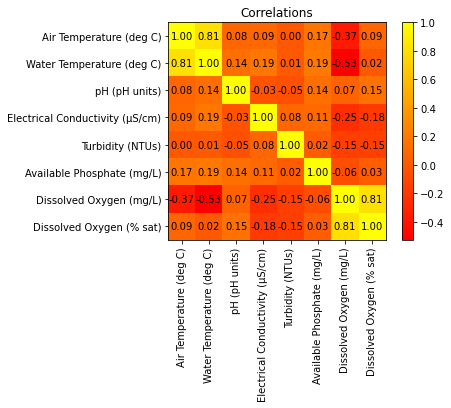

In [27]:
corr = sub_data.corr()
n_var=len(corr)

plt.imshow(corr, cmap = 'autumn')
plt.xticks(range(n_var), corr.columns,rotation=90)
plt.yticks(range(n_var), corr.columns)

for i in range(n_var):
    for j in range(n_var):
        #              format to 2 decimal places  ,  horizonta/vertical align center  
        plt.text(i, j, '{:.2f}'.format(corr.iloc[i, j]), ha="center", va="center", color="k", fontsize = 10)

plt.colorbar()

plt.title('Correlations')
plt.savefig('correlation.png')

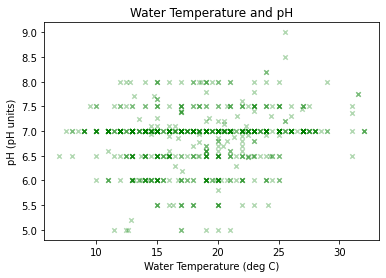

In [28]:
x = river_cleaned['Water Temperature (deg C)']
y = river_cleaned['pH (pH units)']

plt.xlabel('Water Temperature (deg C)')
plt.ylabel('pH (pH units)')
plt.title('Water Temperature and pH')
plt.scatter(x,y,s=20, c ='green',alpha=0.3,marker='x')
plt.savefig('plot')

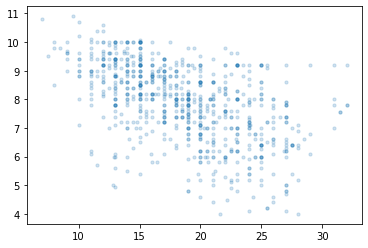

In [29]:
xph = river_cleaned['Water Temperature (deg C)']
yph = river_cleaned['Dissolved Oxygen (mg/L)']

plt.scatter(xph,yph,s=10,alpha = 0.2)
plt.savefig('plot')

# CODE

In [37]:
river_raw['SITE CODE'].value_counts()

K3       55
K2       55
K4       54
NN2      52
B3.2     52
B6       52
B5       50
NN1      45
B7       44
K1.1     43
K1.2     39
B3       39
R1       37
B2       34
B7.1     33
K1       30
NN1.1    30
B4       30
B2.1     29
S1       28
NN1.2    23
B8.1     21
B1       21
B8       19
B3.1     19
K1.3     14
NN1.3    13
K1.4     10
B5.1      9
B3.3      4
K1        2
NN1       1
Nn1.2     1
B3        1
B2.1      1
Name: SITE CODE, dtype: int64

In [41]:
df = river_raw[river_raw['SITE CODE'].apply(lambda x:True if x[0]=='B' else False)]

In [69]:
df

,SITE CODE,Location Name,Latitude/Northings,Longitude/Eastings,EPSG Code,Survey Date,Survey Time,Site observations,Survey duration (hrs),Sampler group name *,...,Photos uploaded,Verifyed by Ingrid,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,B1,"Bellinger B1 - Bellinger River, downstream of ...",-30.466900,152.578610,"WGS 84, Lat/Lon",2017-10-10 13:20:00,2017-10-10 13:20:00,"Flow has increased, no algae sited, clear wate...",0.5,Bellingen Riverwatch,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B1,"Bellinger B1 - Bellinger River, downstream of ...",-30.481530,152.871050,"WGS 84, Lat/Lon",2017-11-14 14:00:00,2017-11-14 09:35:00,"Sunny. Sound of Marsh frogs, School of bass, B...",1,Bellingen Riverwatch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B1,"Bellinger B1 - Bellinger River, downstream of ...",-30.466900,152.578610,"WGS 84, Lat/Lon",2017-12-12 00:00:00,10:30:00,"Warm sunny day, good flow, clear water, no vis...",1,Bellingen Riverwatch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B1,"Bellinger B1 - Bellinger River, downstream of ...",-30.466900,152.578610,"WGS 84, Lat/Lon",2018-01-10 11:40:00,2018-01-10 11:40:00,NaN,NaN,Bellingen Riverwatch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B1,"Bellinger B1 - Bellinger River, downstream of ...",-30.466900,152.578610,"WGS 84, Lat/Lon",2018-02-13 12:45:00,2018-02-13 12:45:00,"Steady flow, hot humid conditions, clear water",NaN,Bellingen Riverwatch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,B8.1,"Bellinger B8.1 - Bellinger River, upstream Nor...",-30.451078,153.009982,"WGS 84, Lat/Lon",2021-03-10 00:00:00,11:45:00,"fine, with a little cloud. The water was turbi...",1,Bellingen Riverwatch,...,NaN,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,B8.1,"Bellinger B8.1 - Bellinger River, upstream Nor...",-30.451078,153.009982,"WGS 84, Lat/Lon",2021-04-13 00:00:00,14:45:00,"Sunny day, nil pollution, fish, bird life, nil...",1,Bellingen Riverwatch,...,[https://biocollect.ala.org.au/image?id=13-4-2...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,B8.1,"Bellinger B8.1 - Bellinger River, upstream Nor...",-30.451078,153.009982,"WGS 84, Lat/Lon",2021-05-12 00:00:00,13:15:00,"Cloudy, fish and bird life, algae present, fis...",1.5,Bellingen Riverwatch,...,[https://biocollect.ala.org.au/image?id=Riverw...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,B8.1,"Bellinger B8.1 - Bellinger River, upstream Nor...",-30.451078,153.009982,"WGS 84, Lat/Lon",2021-07-13 00:00:00,14:45:00,"Cloudy day, no rain, nil pollution visible, sm...",1.5,Bellingen Riverwatch,...,[https://biocollect.ala.org.au/image?id=Riverw...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
list(df)

['SITE CODE',
 'Location Name',
 'Latitude/Northings',
 'Longitude/Eastings',
 'EPSG Code',
 'Survey Date',
 'Survey Time',
 'Site observations',
 'Survey duration (hrs)',
 'Sampler group name *',
 'Number in sampler group',
 'No. of volunteers testing',
 'Water type',
 'Rainfall in last 7 days',
 'Rainfall (mm) (optional)',
 'Water level or flow',
 'Rate of Flow (optional)',
 'Air Temperature (deg C)',
 'Water Temperature (deg C)',
 'pH (pH units)',
 'Electrical Conductivity (µS/cm)',
 'Turbidity (NTUs)',
 'Available Phosphate (mg/L)',
 'Dissolved Oxygen (mg/L)',
 'Dissolved Oxygen (% sat)',
 'Faecal Coliforms (CFU/100mL)',
 'E. coli (CFU/100mL)',
 'Total Phosphate (mg/L)',
 'Nitrates (mg/L as N)',
 'Did you calibrate your EC meter?',
 'Water Testing Notes/Issues',
 'Photos uploaded',
 'Verifyed by Ingrid',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40']

In [ ]:
# What were the water quality grades and scores for 
# Bellingen Riverwatch sites annually and each summer?

In [74]:
df1 = df[['Survey Date','pH (pH units)',
'Electrical Conductivity (µS/cm)',
'Turbidity (NTUs)',
'Available Phosphate (mg/L)',
'Dissolved Oxygen (mg/L)',
'Dissolved Oxygen (% sat)']]

In [75]:
df1.isna().sum()

Survey Date                         0
pH (pH units)                      28
Electrical Conductivity (µS/cm)    44
Turbidity (NTUs)                   24
Available Phosphate (mg/L)         69
Dissolved Oxygen (mg/L)            73
Dissolved Oxygen (% sat)           77
dtype: int64

In [76]:
df1 = df1.fillna(method='ffill')

In [77]:
df1

,Survey Date,pH (pH units),Electrical Conductivity (µS/cm),Turbidity (NTUs),Available Phosphate (mg/L),Dissolved Oxygen (mg/L),Dissolved Oxygen (% sat)
0,2017-10-10 13:20:00,7.0,80.0,7.0,0.05,7.9,87.0
1,2017-11-14 14:00:00,7.5,100.0,7.0,0.21,7.5,86.0
2,2017-12-12 00:00:00,7.0,80.0,7.0,0.04,8.0,93.0
3,2018-01-10 11:40:00,7.0,70.0,7.0,0.07,6.5,80.0
4,2018-02-13 12:45:00,7.0,70.0,7.0,0.06,6.4,79.0
...,...,...,...,...,...,...,...
453,2021-03-10 00:00:00,6.0,1940.0,10.0,0.08,7.9,94.0
454,2021-04-13 00:00:00,6.0,820.0,15.0,0.00,7.2,78.0
455,2021-05-12 00:00:00,7.0,8000.0,15.0,0.03,6.8,75.0
456,2021-07-13 00:00:00,6.0,29000.0,15.0,0.00,7.8,81.0


In [84]:
# Summer
# December to February


In [ ]:
Water Quality Ratings above for * * Salinity and ** Conductivity are NOT applicable
to estuarine ecosystems and are only applicable to freshwater ecosystems;

In [79]:
df1.head()

,Survey Date,pH (pH units),Electrical Conductivity (µS/cm),Turbidity (NTUs),Available Phosphate (mg/L),Dissolved Oxygen (mg/L),Dissolved Oxygen (% sat)
0,2017-10-10 13:20:00,7.0,80.0,7.0,0.05,7.9,87.0
1,2017-11-14 14:00:00,7.5,100.0,7.0,0.21,7.5,86.0
2,2017-12-12 00:00:00,7.0,80.0,7.0,0.04,8.0,93.0
3,2018-01-10 11:40:00,7.0,70.0,7.0,0.07,6.5,80.0
4,2018-02-13 12:45:00,7.0,70.0,7.0,0.06,6.4,79.0


In [80]:
df1['year']=df1['Survey Date'].dt.year
df1['month']=df1['Survey Date'].dt.month

In [82]:
df1.drop('Survey Date',axis=1,inplace=True)

In [85]:
df1.head()

,pH (pH units),Electrical Conductivity (µS/cm),Turbidity (NTUs),Available Phosphate (mg/L),Dissolved Oxygen (mg/L),Dissolved Oxygen (% sat),year,month
0,7.0,80.0,7.0,0.05,7.9,87.0,2017,10
1,7.5,100.0,7.0,0.21,7.5,86.0,2017,11
2,7.0,80.0,7.0,0.04,8.0,93.0,2017,12
3,7.0,70.0,7.0,0.07,6.5,80.0,2018,1
4,7.0,70.0,7.0,0.06,6.4,79.0,2018,2


In [90]:
# What were the water quality grades and scores for 
# Bellingen Riverwatch sites annually and each summer?

df1.groupby('year')[list(df1)[:-2]].mean()

,pH (pH units),Electrical Conductivity (µS/cm),Turbidity (NTUs),Available Phosphate (mg/L),Dissolved Oxygen (mg/L),Dissolved Oxygen (% sat)
year,,,,,,
2017,7.128333,83.900000,7.458333,0.046875,8.427083,90.687500
2018,7.141975,88.649383,7.333333,0.082222,8.133333,88.283951
2019,7.084907,304.218519,11.305556,0.066204,6.882778,76.037037
2020,6.761029,1616.208088,17.323529,0.071728,7.534926,82.544118
2021,6.574118,968.611765,8.576471,0.042353,7.803059,81.952941


In [105]:
df2 = df1[df1['month'].isin([1,2,12])]
df2['month'] = df2['month'].apply(lambda x: 'Summer')
df2.groupby(['year','month']).mean()

,,pH (pH units),Electrical Conductivity (µS/cm),Turbidity (NTUs),Available Phosphate (mg/L),Dissolved Oxygen (mg/L),Dissolved Oxygen (% sat)
year,month,,,,,,
2017,Summer,7.255556,77.111111,7.000000,0.043333,7.866667,91.444444
2018,Summer,7.126400,83.352000,7.080000,0.069600,7.164000,85.160000
2019,Summer,7.039259,88.833333,7.851852,0.073704,6.505926,78.185185
2020,Summer,6.818421,3690.331579,27.973684,0.097632,6.919737,83.078947
2021,Summer,6.588889,299.444444,9.333333,0.059444,7.044444,80.111111


In [106]:
# EDA

In [116]:
river_cleaned['Water type'] = river_cleaned['Water type'].replace(['Fresh', 'Fres'],['Freshwater','Freshwater'])

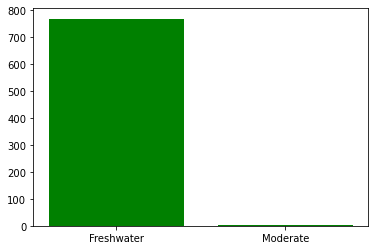

In [130]:
x = river_cleaned['Water type'].value_counts()
plt.bar(x.index,x,color='g')
plt.show()

In [126]:
river_cleaned['Rainfall in last 7 days'] = river_cleaned['Rainfall in last 7 days'].replace(['light','nil'],['Light','Nil'])

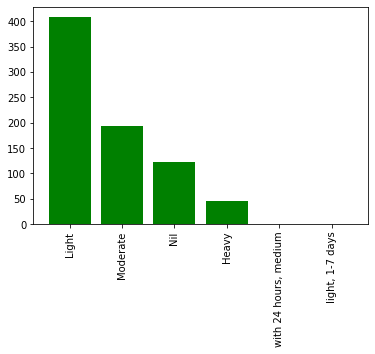

In [128]:
x = river_cleaned['Rainfall in last 7 days'].value_counts()
plt.bar(x.index,x,color='g')
plt.xticks(rotation=90)
plt.show()

In [131]:
river_cleaned

,SITE CODE,Survey Date,Water type,Rainfall in last 7 days,Air Temperature (deg C),Water Temperature (deg C),pH (pH units),Electrical Conductivity (µS/cm),Turbidity (NTUs),Available Phosphate (mg/L),Dissolved Oxygen (mg/L),Dissolved Oxygen (% sat),year,month
0,B1,2017-10-10 13:20:00,Freshwater,Moderate,22.0,20.0,7.0,80.0,7.0,0.05,7.9,87.0,2017,10
2,B1,2017-12-12 00:00:00,Freshwater,Moderate,26.0,23.0,7.0,80.0,7.0,0.04,8.0,93.0,2017,12
3,B1,2018-01-10 11:40:00,Freshwater,Light,26.0,26.0,7.0,70.0,7.0,0.07,6.5,80.0,2018,1
4,B1,2018-02-13 12:45:00,Freshwater,Nil,26.0,26.0,7.0,70.0,7.0,0.06,6.4,79.0,2018,2
5,B1,2018-04-01 12:30:00,Freshwater,Light,26.0,19.0,7.0,80.0,7.0,0.09,8.0,86.0,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,S1,2021-01-12 00:00:00,Freshwater,Moderate,26.0,19.0,6.0,100.0,7.0,0.05,6.6,71.0,2021,1
986,S1,2021-02-10 00:00:00,Freshwater,Light,23.0,21.6,7.3,120.0,10.0,0.03,4.0,46.0,2021,2
987,S1,2021-04-13 00:00:00,Freshwater,Moderate,21.0,17.0,5.5,130.0,7.0,0.02,7.5,78.0,2021,4
988,S1,2021-08-10 00:00:00,Freshwater,Light,19.5,14.8,7.7,145.0,10.0,0.07,7.2,71.0,2021,8


In [132]:
def grade(x):
    if x>=6 and x<=8:
        return 'good'
    else:
        return 'poor'

In [133]:
river_cleaned['pH_grade'] = river_cleaned['pH (pH units)'].apply(lambda x: grade(x))

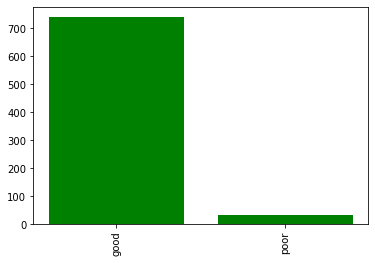

In [137]:
x = river_cleaned['pH_grade'].value_counts()
plt.bar(x.index,x,color='g')
plt.xticks(rotation=90)
plt.show()

In [147]:
df4 = river_cleaned[['year','pH_grade','month']].groupby(['year','pH_grade']).count().reset_index()

In [148]:
df4

,year,pH_grade,month
0,2017,good,84
1,2018,good,165
2,2018,poor,1
3,2019,good,189
4,2019,poor,4
5,2020,good,175
6,2020,poor,13
7,2021,good,127
8,2021,poor,14


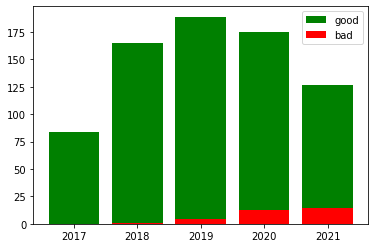

In [162]:
x = df4[df4['pH_grade']=='good']
y = df4[df4['pH_grade']!='good']
plt.bar(x.year,x.month,color='g',label='good')
plt.bar(y.year,y.month,color='r',label='bad')
plt.legend()
plt.show()